# IRCDL papers

In [1]:
import pandas as pd
import matplotlib
from ast import literal_eval

Data already provided in the `data/raw` folder as downloaded from DBLP at the URL https://dblp.org/search/publ/api?q=stream%3Astreams%2Fconf%2Fircdl%3A&h=1000&format=json.

Uncomment the following cell and execute to fetch raw data from DBLP.

In [2]:
dblp = 'https://dblp.org/search/publ/api?q=stream%3Astreams%2Fconf%2Fircdl%3A&h=1000&format=json'
dblp_path = '../data/raw/ircdl_dblp.json'

In [3]:
# from urllib.request import urlretrieve

# urlretrieve(dblp, dblp_path)

## Process raw data

In [4]:
import json, csv

csv_path = '../data/processed/ircdl_dblp.csv'

with open(dblp_path, 'r') as dblp_file, open(csv_path, 'w') as csv_file:
    dblp = json.load(dblp_file)

    writer = csv.writer(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    writer.writerow(['key', 'doi', 'url', 'ee', 'year', 'authors', 'title', 'venue', 'pages', 'length', 'type', 'access'])
    for hit in dblp['result']['hits']['hit']:
        paper = hit['info']
        
        if 'authors' in paper:
            # authors = ', '.join([a['text'] for a in paper['authors']['author']]) if isinstance(paper['authors']['author'], list) else paper['authors']['author']['text']
            authors = [a['text'] for a in paper['authors']['author']] if isinstance(paper['authors']['author'], list) else [paper['authors']['author']['text']]
        else:
            authors = []

        key = paper['key'] if 'key' in paper else None
        doi = paper['doi'] if 'doi' in paper else None
        access = paper['access'] if 'access' in paper else None
        ee = paper['ee'] if 'ee' in paper else None
        range = paper['pages'] if 'pages' in paper else None
        venue = paper['venue'] if 'venue' in paper else None
        if range is not None:
            pages = range.split('-')
            length = int(pages[1]) - int(pages[0])
        else:
            length = None
        
        writer.writerow([key, doi, paper['url'], ee, paper['year'], authors, paper['title'], venue, range, length, paper['type'], access])

## Analysis

Load DBLP data

In [5]:
df = pd.read_csv('../data/processed/ircdl_dblp.csv')
df.authors = df.authors.apply(literal_eval)

df.head(5)

,key,doi,url,ee,year,authors,title,venue,pages,length,type,access
0,conf/ircdl/AmbrosinoAPS23,NaN,https://dblp.org/rec/conf/ircdl/AmbrosinoAPS23,https://ceur-ws.org/Vol-3365/short16.pdf,2023,"[Maria Anna Ambrosino, Vanja Annunziata, Maria...",The Hetor project: a joint effort to co-create...,IRCDL,216-224,8.0,Conference and Workshop Papers,open
1,conf/ircdl/BagchiD23,NaN,https://dblp.org/rec/conf/ircdl/BagchiD23,https://ceur-ws.org/Vol-3365/short1.pdf,2023,"[Mayukh Bagchi, Subhashis Das]",Disentangling Domain Ontologies.,IRCDL,17-28,11.0,Conference and Workshop Papers,open
2,conf/ircdl/BaglioniMPBM23,NaN,https://dblp.org/rec/conf/ircdl/BaglioniMPBM23,https://ceur-ws.org/Vol-3365/paper2.pdf,2023,"[Miriam Baglioni, Andrea Mannocci, Gina Pavone...",(Semi)automated disambiguation of scholarly re...,IRCDL,47-59,12.0,Conference and Workshop Papers,open
3,conf/ircdl/BarbutiBRCP23,NaN,https://dblp.org/rec/conf/ircdl/BarbutiBRCP23,https://ceur-ws.org/Vol-3365/short17.pdf,2023,"[Nicola Barbuti, Mauro De Bari, Stefania Riso,...",The Open Memory Apulia Project. How Open Data ...,IRCDL,225-232,7.0,Conference and Workshop Papers,open
4,conf/ircdl/BardiBM23,NaN,https://dblp.org/rec/conf/ircdl/BardiBM23,https://ceur-ws.org/Vol-3365/short12.pdf,2023,"[Alessia Bardi, Margo Bargheer, Paolo Manghi]",A Discovery Hub for Diamond Open Access publis...,IRCDL,162-166,4.0,Conference and Workshop Papers,open


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      419 non-null    object 
 1   doi      249 non-null    object 
 2   url      419 non-null    object 
 3   ee       366 non-null    object 
 4   year     419 non-null    int64  
 5   authors  419 non-null    object 
 6   title    419 non-null    object 
 7   venue    419 non-null    object 
 8   pages    366 non-null    object 
 9   length   366 non-null    float64
 10  type     419 non-null    object 
 11  access   407 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 39.4+ KB


Examine type field

In [7]:
df.type.value_counts()

type
Conference and Workshop Papers    398
Editorship                         21
Name: count, dtype: int64

Filter papers only

In [8]:
papers = df[df.type == 'Conference and Workshop Papers']
papers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 0 to 417
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      398 non-null    object 
 1   doi      238 non-null    object 
 2   url      398 non-null    object 
 3   ee       349 non-null    object 
 4   year     398 non-null    int64  
 5   authors  398 non-null    object 
 6   title    398 non-null    object 
 7   venue    398 non-null    object 
 8   pages    366 non-null    object 
 9   length   366 non-null    float64
 10  type     398 non-null    object 
 11  access   398 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 40.4+ KB


Check venues

In [9]:
papers.venue.value_counts()

venue
IRCDL           370
VIPERC@IRCDL     18
NLP4DL/AT4DL     10
Name: count, dtype: int64

Spurous venue at DBLP; filter IRCDL only

In [10]:
papers = papers[papers.venue == 'IRCDL']
papers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370 entries, 0 to 417
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      370 non-null    object 
 1   doi      228 non-null    object 
 2   url      370 non-null    object 
 3   ee       321 non-null    object 
 4   year     370 non-null    int64  
 5   authors  370 non-null    object 
 6   title    370 non-null    object 
 7   venue    370 non-null    object 
 8   pages    338 non-null    object 
 9   length   338 non-null    float64
 10  type     370 non-null    object 
 11  access   370 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 37.6+ KB


Checking paper length

<Axes: >

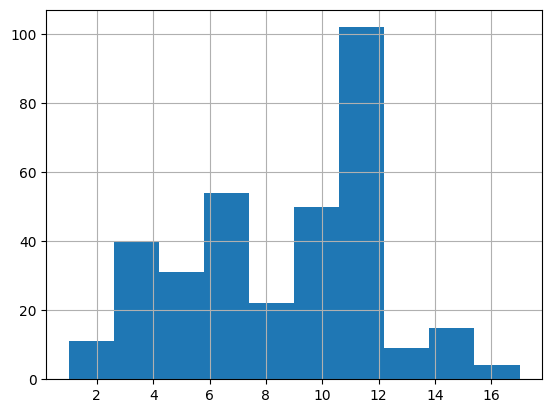

In [11]:
papers.length.hist()

Tell long and short papers apart (assumption on paper lenght)

In [12]:
long = papers[papers.length >= 10]
short = papers[papers.length < 10]
long.head()

,key,doi,url,ee,year,authors,title,venue,pages,length,type,access
1,conf/ircdl/BagchiD23,NaN,https://dblp.org/rec/conf/ircdl/BagchiD23,https://ceur-ws.org/Vol-3365/short1.pdf,2023,"[Mayukh Bagchi, Subhashis Das]",Disentangling Domain Ontologies.,IRCDL,17-28,11.0,Conference and Workshop Papers,open
2,conf/ircdl/BaglioniMPBM23,NaN,https://dblp.org/rec/conf/ircdl/BaglioniMPBM23,https://ceur-ws.org/Vol-3365/paper2.pdf,2023,"[Miriam Baglioni, Andrea Mannocci, Gina Pavone...",(Semi)automated disambiguation of scholarly re...,IRCDL,47-59,12.0,Conference and Workshop Papers,open
5,conf/ircdl/BernasconiCM23,NaN,https://dblp.org/rec/conf/ircdl/BernasconiCM23,https://ceur-ws.org/Vol-3365/paper1.pdf,2023,"[Eleonora Bernasconi, Miguel Ceriani, Massimo ...",Linked Data interfaces: a survey.,IRCDL,1-16,15.0,Conference and Workshop Papers,open
8,conf/ircdl/DeglInnocentiCC23,NaN,https://dblp.org/rec/conf/ircdl/DeglInnocentiCC23,https://ceur-ws.org/Vol-3365/paper5.pdf,2023,"[Emiliano Degl&apos;Innocenti, Leonardo Canova...",The RESTORE project: a final review.,IRCDL,167-179,12.0,Conference and Workshop Papers,open
10,conf/ircdl/GemelliVM23,NaN,https://dblp.org/rec/conf/ircdl/GemelliVM23,https://ceur-ws.org/Vol-3365/short14.pdf,2023,"[Andrea Gemelli, Emanuele Vivoli, Simone Marinai]",CTE: A Dataset for Contextualized Table Extrac...,IRCDL,197-208,11.0,Conference and Workshop Papers,open


In [13]:
short.head()

,key,doi,url,ee,year,authors,title,venue,pages,length,type,access
0,conf/ircdl/AmbrosinoAPS23,NaN,https://dblp.org/rec/conf/ircdl/AmbrosinoAPS23,https://ceur-ws.org/Vol-3365/short16.pdf,2023,"[Maria Anna Ambrosino, Vanja Annunziata, Maria...",The Hetor project: a joint effort to co-create...,IRCDL,216-224,8.0,Conference and Workshop Papers,open
3,conf/ircdl/BarbutiBRCP23,NaN,https://dblp.org/rec/conf/ircdl/BarbutiBRCP23,https://ceur-ws.org/Vol-3365/short17.pdf,2023,"[Nicola Barbuti, Mauro De Bari, Stefania Riso,...",The Open Memory Apulia Project. How Open Data ...,IRCDL,225-232,7.0,Conference and Workshop Papers,open
4,conf/ircdl/BardiBM23,NaN,https://dblp.org/rec/conf/ircdl/BardiBM23,https://ceur-ws.org/Vol-3365/short12.pdf,2023,"[Alessia Bardi, Margo Bargheer, Paolo Manghi]",A Discovery Hub for Diamond Open Access publis...,IRCDL,162-166,4.0,Conference and Workshop Papers,open
6,conf/ircdl/CastellanoSV23,NaN,https://dblp.org/rec/conf/ircdl/CastellanoSV23,https://ceur-ws.org/Vol-3365/short13.pdf,2023,"[Giovanna Castellano, Raffaele Scaringi, Genna...",Automatic analysis of artistic heritage throug...,IRCDL,192-196,4.0,Conference and Workshop Papers,open
7,conf/ircdl/CastellucciC23,NaN,https://dblp.org/rec/conf/ircdl/CastellucciC23,https://ceur-ws.org/Vol-3365/short15.pdf,2023,"[Paola Castellucci, Gianfranco Crupi]","Put the hands on! For a movable, interactive, ...",IRCDL,209-215,6.0,Conference and Workshop Papers,open


### Top contributors

Explode authors of each single paper

In [14]:
long_contributors = long.authors.explode().value_counts()
long_contributors

authors
Stefano Ferilli            18
Floriana Esposito          13
Nicola Ferro 0001          12
Gianmaria Silvello         11
Giorgio Maria Di Nunzio     9
                           ..
Caterina Bergami            1
Alessandra Pugnetti         1
Laura Pandolfo              1
Luca Pulina                 1
Marco Degemmis              1
Name: count, Length: 320, dtype: int64

Filter out Steering Committee and Advisory Board members and find top contributors (assumption on number of **long papers** published)

In [25]:
to_filter = 'bimbo|manghi|agosti|ferilli|grana|poggi|serra|silvello|catarci|thanos|esposito|tasso'
top_long = long_contributors[(~long_contributors.index.str.lower().str.contains(to_filter)) & (long_contributors > 3)]
top_long[:5]

authors
Nicola Ferro 0001          12
Giorgio Maria Di Nunzio     9
Nicola Orio                 7
Anna Maria Tammaro          6
Domenico Redavid            5
Name: count, dtype: int64

Repeat for **short papers**

In [16]:
short_contributors = short.authors.explode().value_counts()
short_contributors

authors
Nicola Ferro 0001       22
Gianmaria Silvello      14
Maristella Agosti       12
Nicola Orio             11
Paolo Manghi            11
                        ..
Laura Ciancio            1
Rosanna De Rosa 0001     1
Eleonora Pantò           1
Fabio Nascimbeni         1
Nicola Mastidoro         1
Name: count, Length: 319, dtype: int64

In [24]:
top_short = short_contributors[(~short_contributors.index.str.lower().str.contains(to_filter)) & (short_contributors > 3)]
top_short

authors
Nicola Ferro 0001    22
Nicola Orio          11
Carlo Meghini        10
Riccardo Miotto       6
Vittore Casarosa      6
Name: count, dtype: int64

In [29]:
papers.to_pickle('../data/processed/papers.pkl')